## GDP Growth under Obama and Trump
As recounted in an [article in "The Hill"](http://thehill.com/homenews/administration/348600-trump-touts-3-percent-economic-growth-takes-shot-at-obama), President Trump stated the following on August 30, 2017 in a speech on tax reform in Springfield, Missouri:

> We just announced that we hit 3 percent in [gross domestic product]. It just came out. And on a yearly basis, as you know, the last administration during an eight-year period never hit 3 percent, so we're really on our way.

The Hill article goes on to explain that, under Obama, the economy hit or surpassed 3 percent growth during numerous quarters, but never sustained that level of growth for a full year. The following Python code looks at available GDP data to see to what degree the original claim is true.

### Read latest GDP figures from Bureau of Economic Analysis website
The following code reads both the annual and quarterly GDP figures from the Bureau of Economic Analysis website and calculates the percent change between successive periods.

In [41]:
import pandas as pd
# pd.read_excel does not seem to work for 2018Q3 - save and convert file to CSV
#xx = pd.read_excel('https://www.bea.gov/national/xls/gdplev.xlsx', skiprows=7)
xx = pd.read_csv('gdplev.csv', skiprows=7) #Save GDP file locally as a CSV file

aa = xx.iloc[0:89, 0:3] # UPDATE (0:89 = 2017)
aa.columns = ['Year','Current $bil','Chained 2009 $bil']
qq = xx.iloc[0:287, 4:7] #UPDATE (0:286 = 2018Q2
qq.columns = ['Quarter','Current $bil','Chained 2009 $bil']
# Must convert strings to floats if read from CSV file
aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].str.replace(',', '')
qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].str.replace(',', '')
aa['Chained 2009 $bil'] = aa['Chained 2009 $bil'].astype(float)
qq['Chained 2009 $bil'] = qq['Chained 2009 $bil'].astype(float)

aa['Pct_Change'] = aa.loc[:,'Chained 2009 $bil'].pct_change()*100
qq['Pct_Change'] = qq.loc[:,'Chained 2009 $bil'].pct_change()*100
print(aa.head())
print(aa.tail(18))

     Year Current $bil  Chained 2009 $bil  Pct_Change
0  1929.0        104.6             1109.4         NaN
1  1930.0         92.2             1015.1   -8.500090
2  1931.0         77.4              950.0   -6.413161
3  1932.0         59.5              827.5  -12.894737
4  1933.0         57.2              817.3   -1.232628
      Year Current $bil  Chained 2009 $bil  Pct_Change
71  2000.0     10,252.3            13131.0    4.127513
72  2001.0     10,581.8            13262.1    0.998401
73  2002.0     10,936.4            13493.1    1.741806
74  2003.0     11,458.2            13879.1    2.860721
75  2004.0     12,213.7            14406.4    3.799238
76  2005.0     13,036.6            14912.5    3.513022
77  2006.0     13,814.6            15338.3    2.855323
78  2007.0     14,451.9            15626.0    1.875697
79  2008.0     14,712.8            15604.7   -0.136311
80  2009.0     14,448.9            15208.8   -2.537056
81  2010.0     14,992.1            15598.8    2.564305
82  2011.0     1

The above output shows that GDP growth did not reach or exceed 3 percent during any of Obama's eight calendar years from 2009 through 2016. The closest that it came was 2.88 percent in 2015. However, it likewise did not reach 3 percent in Trump's first year, reaching just 2.22 percent in 2017. In fact, the last time that GDP growth surpassed 3 percent was in 2005 when it reached 3.51 percent. The following code generates a plot of GDP growth since 1929, the start of the annual GDP data:

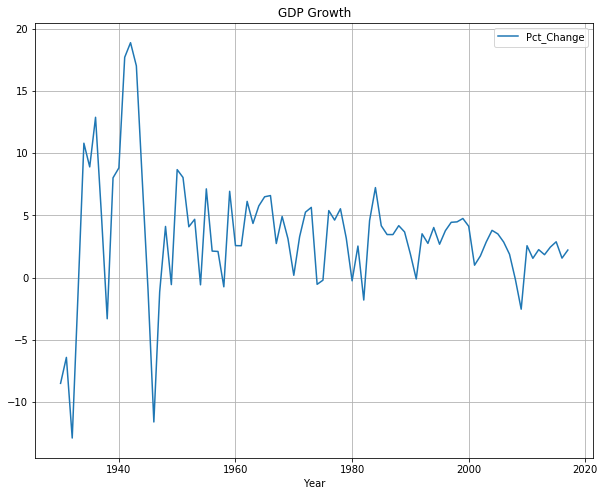

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
aa.plot.line(x='Year',y='Pct_Change',figsize=(10,8),grid=True,title='GDP Growth')

The following code prints the quarterly GDP data and the percent change in real quarterly GDP.

In [43]:
print(qq.head())
print(qq.tail(10))

  Quarter Current $bil  Chained 2009 $bil  Pct_Change
0  1947Q1        243.2             2033.1         NaN
1  1947Q2        246.0             2027.6   -0.270523
2  1947Q3        249.6             2023.5   -0.202210
3  1947Q4        259.7             2055.1    1.561651
4  1948Q1        265.7             2086.0    1.503576
    Quarter Current $bil  Chained 2009 $bil  Pct_Change
277  2016Q2     18,640.7            17622.5    0.565530
278  2016Q3     18,799.6            17706.7    0.477798
279  2016Q4     18,979.2            17784.2    0.437687
280  2017Q1     19,162.6            17863.0    0.443090
281  2017Q2     19,359.1            17995.2    0.740077
282  2017Q3     19,588.1            18120.8    0.697964
283  2017Q4     19,831.8            18223.8    0.568408
284  2018Q1     20,041.0            18324.0    0.549830
285  2018Q2     20,411.9            18511.6    1.023794
286  2018Q3     20,659.0            18671.5    0.863783


As can be seen, the percent change in real quarterly GDP has surpassed one percent just once in the last 10 quarters and then, just barely. This is not that surprising, however, because this is the change for 1 quarter and is not annualized. For this reason, this percent change is not especially useful in this form.

### Calculate percent change over the each quarter (annualized), each 4 quarters, and each calendar year
To remedy this, the following code annualizes the quarterly percent change and also calculates the percent change over every consecutive four quarters, as well as each calendar year.

In [44]:
qq['iYear'] = qq['Quarter'].str[0:4]
qq['iQtr'] = qq['Quarter'].str[5:6]
qq['Year'] = pd.to_numeric(qq['iYear']) + (pd.to_numeric(qq['iQtr'])-1) * 0.25
qq['Change1q'] = (((1 + qq.loc[:,'Chained 2009 $bil'].pct_change())**4)-1)*100
qq['Change4q'] = (qq.loc[:,'Chained 2009 $bil'].pct_change(periods=4))*100
for index,row in aa.iterrows():
    qq.loc[qq['Year']==row['Year'],'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.25),'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.50),'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.75),'Change1y'] = row['Pct_Change']
gg = qq.loc[:, ['Quarter','Year','Change1q','Change4q','Change1y']]
print(gg.tail(n=40))

    Quarter     Year  Change1q  Change4q  Change1y
247  2008Q4  2008.75 -8.378248 -2.753458 -0.136311
248  2009Q1  2009.00 -4.416054 -3.289432 -2.537056
249  2009Q2  2009.25 -0.574113 -3.924506 -2.537056
250  2009Q3  2009.50  1.464286 -3.049722 -2.537056
251  2009Q4  2009.75  4.468203  0.183325 -2.537056
252  2010Q1  2010.00  1.545728  1.710225  2.564305
253  2010Q2  2010.25  3.741260  2.796334  2.564305
254  2010Q3  2010.50  2.981873  3.178574  2.564305
255  2010Q4  2010.75  2.021268  2.569012  2.564305
256  2011Q1  2011.00 -0.956513  1.931223  1.550760
257  2011Q2  2011.25  2.889610  1.721378  1.550760
258  2011Q3  2011.50 -0.111169  0.948826  1.550760
259  2011Q4  2011.75  4.718218  1.609462  1.550760
260  2012Q1  2012.00  3.168668  2.651342  2.249269
261  2012Q2  2012.25  1.732221  2.361438  2.249269
262  2012Q3  2012.50  0.541878  2.528333  2.249269
263  2012Q4  2012.75  0.454514  1.468374  2.249269
264  2013Q1  2013.00  3.591924  1.572284  1.842316
265  2013Q2  2013.25  0.494107 

As can be seen from the above output, annualized quarterly GDP growth did surpass 3 percent under Obama in the following quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
251  2009Q4  2009.75  4.468203  0.183325 -2.537056
253  2010Q2  2010.25  3.741260  2.796334  2.564305
259  2011Q4  2011.75  4.718218  1.609462  1.550760
260  2012Q1  2012.00  3.168668  2.651342  2.249269
264  2013Q1  2013.00  3.591924  1.572284  1.842316
266  2013Q3  2013.50  3.170549  1.917303  1.842316
267  2013Q4  2013.75  3.229843  2.614061  1.842316
269  2014Q2  2014.25  5.110240  2.602541  2.451593
270  2014Q3  2014.50  4.925003  3.035985  2.451593
272  2015Q1  2015.00  3.331728  3.808275  2.881099
273  2015Q2  2015.25  3.339844  3.368370  2.881099
</pre>

In addition, it surpassed 3 percent under Trump in the last 2 of his 7 quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
285  2018Q2  2018.25  4.158495  2.869654       NaN
286  2018Q3  2018.50  3.500156  3.039049       NaN
</pre>

Over all spans of 4 quarters, real GDP growth surpassed 3 percent under Obama in spans starting in the following quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
254  2010Q3  2010.50  2.981873  3.178574  2.564305
270  2014Q3  2014.50  4.925003  3.035985  2.451593
272  2015Q1  2015.00  3.331728  3.808275  2.881099
273  2015Q2  2015.25  3.339844  3.368370  2.881099
</pre>

There have been four spans of 4 quarters under Trump and GDP growth just surpassed 3 percent during the last one:

286  2018Q3  2018.50  3.500156  3.039049       NaN

Finally, as previously mentioned, GDP growth did not surpass 3 percent growth during a calendar year under either Obama or Trump though it is likely to surpass 3 percent for 2018. In any case, the following code generates a plot that shows all of the abovementioned percent changes.

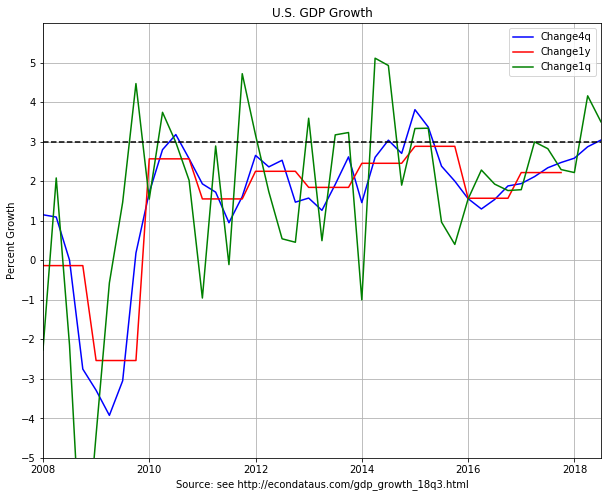

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
#rr = qq[pd.to_numeric(qq['iYear']) >= 2008]
#rr.plot.line(x='Year',y=['Change4q','Change1y','Change1q'],figsize=(10,8),grid=True,title='GDP Growth',yticks=range(-9,6),ylim=(-5,6))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. GDP Growth')
ax.set_xlabel('Source: see http://econdataus.com/gdp_growth_18q3.html')
ax.set_ylabel('Percent Growth')
ax.set_xlim([2008,2018.5]) # #UPDATE x-axis
ax.set_ylim([-5,6])
ax.set_yticks(range(-5,6))
ax.plot(qq.Year,qq.Change4q,'b-')
ax.plot(qq.Year,qq.Change1y,'r-')
ax.plot(qq.Year,qq.Change1q,'g-')
ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('gdp08_18q3.png')

Hence, saying that "the last administration during an eight-year period never hit 3 percent" and that "we hit 3 percent" was comparing annual calendar figures with quarterly figures (at least when stated in 2017). This is arguably equivalent to comparing apples and oranges. At the very least, it would seem that the current administration had no real grounds to claim that they have improved economic growth at that point. Only if they can consistently surpass 3 percent real GDP growth over several years and/or measurably increase the average GDP growth, would it seem valid to make that claim.

On this topic, it's instructive to look at the GDP projections in Table 3 on page 9 of the [OMB's Mid-Session Review for Fiscal Year 2019](https://www.whitehouse.gov/wp-content/uploads/2018/07/19msr.pdf).



Economic Assumptions for Real GDP (Fourth Quarter-over-Fourth Quarter):

|             | 2017 | 2018 | 2019 | 2020 | 2021 | 2022 | 2023 | 2024 | 2025 | 2026 | 2027 | 2028 |
| ----------- | ----:| ----:| ----:| ----:| ----:| ----:| ----:| ----:| ----:| ----:| ----:| ----:|
| 2019 MSR    |  2.6 |  3.1 |  3.2 |  3.1 |  3.0 |  3.0 |  3.0 |  3.0 |  2.9 |  2.8 |  2.8 |  2.8 |
| 2019 Budget |  2.5 |  3.1 |  3.2 |  3.1 |  3.0 |  3.0 |  3.0 |  3.0 |  2.9 |  2.8 |  2.8 |  2.8 |
| CBO         |  2.5 |  3.3 |  2.4 |  1.8 |  1.5 |  1.6 |  1.6 |  1.8 |  1.7 |  1.7 |  1.9 |  1.8 |
| Blue Chip   |  2.6 |  2.9 |  2.3 |  1.8 |  1.9 |  2.1 |  2.1 |  2.1 |  2.0 |  2.0 |  2.0 |  2.0 |
| FOMC        |   | 2.7–3.0 | 2.2–2.6 | 1.8–2.1 | 1.8–2.0 | (longer run) |

As can be seen, all sources project 2018 GDP growth of about 3 percent but only the Trump administration's Budget and Mid-Session Review project that this growth will continue.  The CBO (Congressional Budget Office), Blue Chip consensus forecast, and FOMC (Federal Reserve Open Market Committee) all project that this growth will drop over half of a percent in 2019 and a full percent from 2020 on.  Hence, the real story regarding GDP growth will be told in 2019 and the following years.  There is a PBS article on this topic titled ["How Trump’s tax cuts are boosting GDP, and why that might not last"](https://www.pbs.org/newshour/economy/making-sense/how-trumps-tax-cuts-are-boosting-gdp-and-why-that-might-not-last).

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/gdp_growth_18q3.ipynb. It is identical to the one at http://econdataus.com/gdp_growth.ipynb except that it has been updated to include Q3 of 2018. Links to additional Jupyter Notebooks can be found at http://econdataus.com/jupyter.html.